In [3]:
import matplotlib.pyplot as plt
from pylab import *
import networkx as nx
import random as rd
import numpy as np


def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']


def update_new():
    global g 
    states = [] 
    for i in range(len(g.nodes())):
        states.append(g.nodes[i]['state'])
        
    if sum(states) == len(g.nodes()):
        return True 
    
    elif sum(states) == 0:
        return True 
    
    else:
        return False 


Mean: 589.76


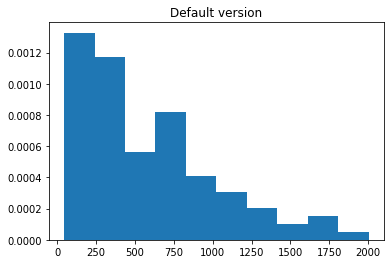

In [5]:
def convergence_steps(n):
    tot_count_convergence = []
    
    for i in range(n):
        initialize()         
        steps = 0       
        while update_new() == False:
            update()            
            steps += 1
        
        tot_count_convergence.append(steps)
        
    return tot_count_convergence
        
avg_steps_convergence = convergence_steps(100)

plt.hist(avg_steps_convergence, density = True)
plt.title("Default version")
print("Mean:", np.mean(avg_steps_convergence))

In [6]:
def update_reversed():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

Mean: 4040.81


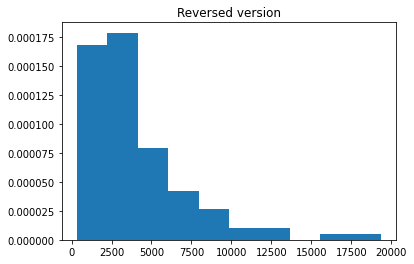

In [7]:
def convergence_steps(n):
    tot_count_convergence = []
    
    for i in range(n):
        initialize()         
        steps = 0       
        while update_new() == False:
            update_reversed()            
            steps += 1
        
        tot_count_convergence.append(steps)
        
    return tot_count_convergence
        
avg_steps_convergence = convergence_steps(100)

plt.hist(avg_steps_convergence, density = True)
plt.title("Reversed version")
print("Mean:", np.mean(avg_steps_convergence))

In [8]:
def update_edge():
    global g
    
    node = rd.choice(list(g.edges))
    
    node = list(node)
    
    speaker = rd.choice(node)
    node.remove(speaker)
    listener = rd.choice(node)

    g.nodes[listener]['state'] = g.nodes[speaker]['state']

Mean: 1005.99


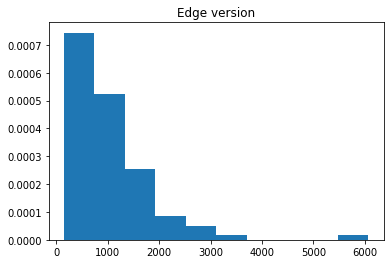

In [9]:
def convergence_steps(n):
    tot_count_convergence = []
    
    for i in range(n):
        initialize()         
        steps = 0       
        while update_new() == False:
            update_edge()            
            steps += 1
        
        tot_count_convergence.append(steps)
        
    return tot_count_convergence
        
avg_steps_convergence = convergence_steps(100)

plt.hist(avg_steps_convergence, density = True)
plt.title("Edge version")
print("Mean:", np.mean(avg_steps_convergence))